In [55]:
#import dependencies

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

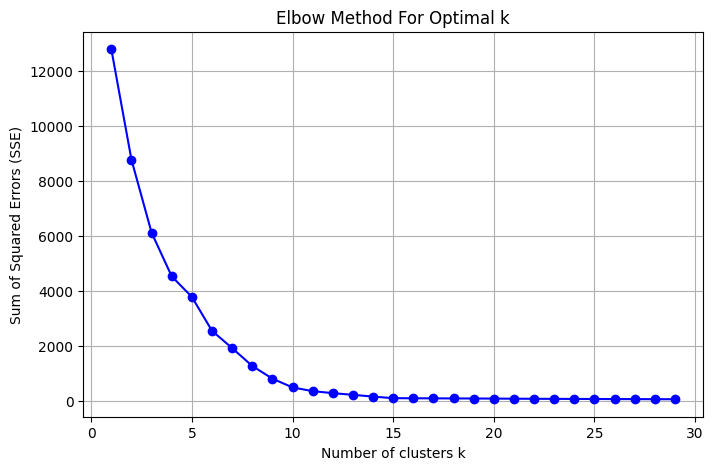

In [56]:
data = np.loadtxt('SynData1.txt')  #file is 2 numbers per line separated by whitespace

#do elbow to find optimal number of clusters
sse = [] 

#try 1 to 30 clusters
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

#plot sse vs k
plt.figure(figsize=(8,5))
plt.plot(list(range(1,30)), sse, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


For k = 5
Number of iterations: 16
Within-cluster SSE: 3783.8994422114247


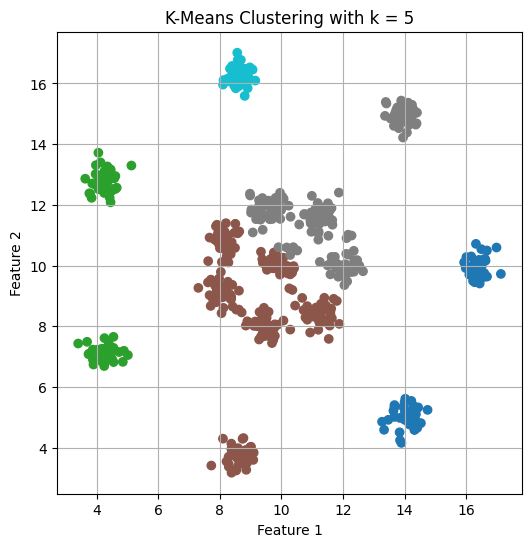

For k = 10
Number of iterations: 4
Within-cluster SSE: 499.59964659682583


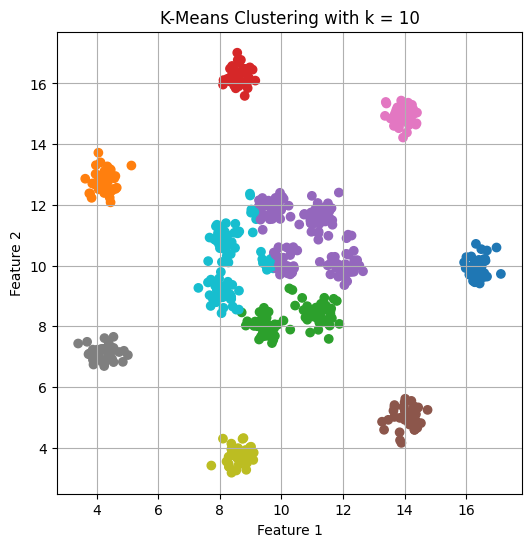

For k = 15
Number of iterations: 9
Within-cluster SSE: 108.61904081338334


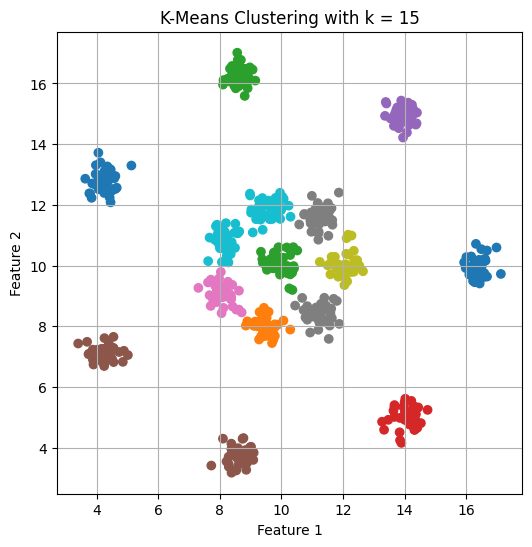

For k = 20
Number of iterations: 4
Within-cluster SSE: 93.45651785835409


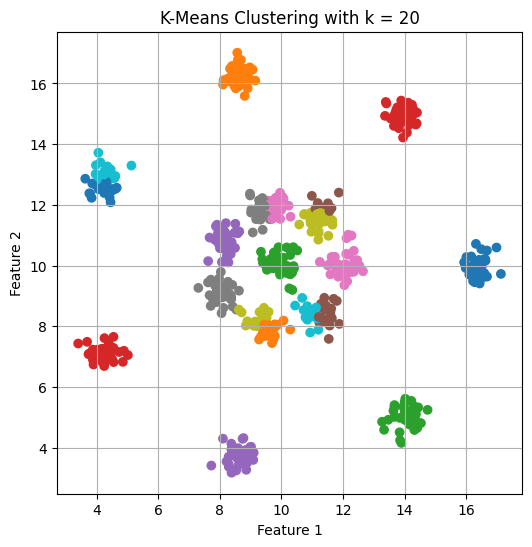

For k = 25
Number of iterations: 11
Within-cluster SSE: 79.12442346012743


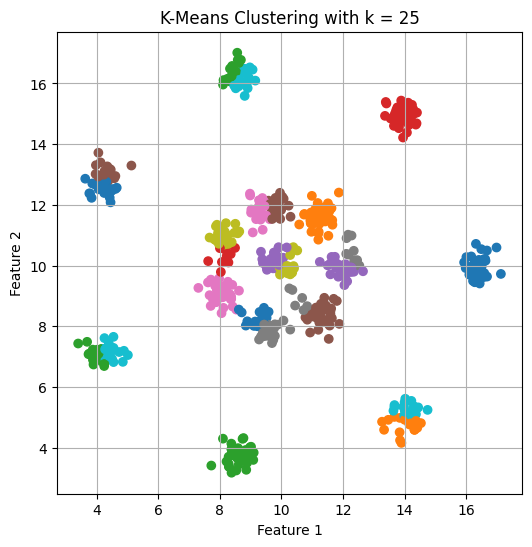

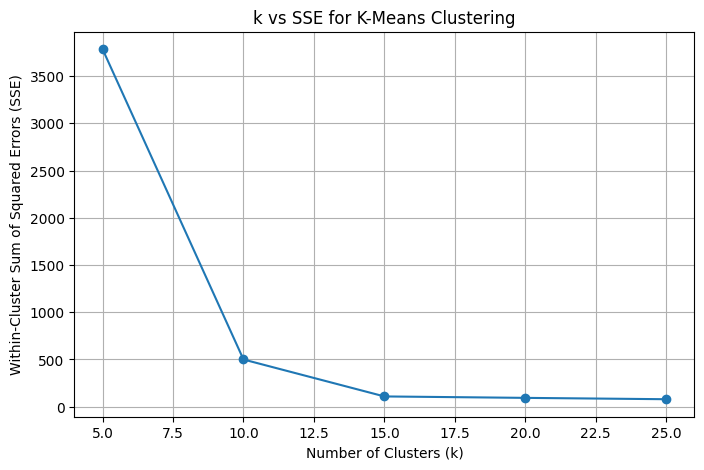

In [57]:
#run kmeans for different ks
k_vals = [5, 10, 15, 20, 25]
sse_list = []  # to store SSE values for plotting later

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(data)
    labels = kmeans.labels_
    
    print(f"For k = {k}")
    print(f"Number of iterations: {kmeans.n_iter_}")
    print(f"Within-cluster SSE: {kmeans.inertia_}")

    #store to plot 
    sse_list.append(kmeans.inertia_)

    #plot
    plt.figure(figsize=(6,6))
    plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10')
    plt.title(f'K-Means Clustering with k = {k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

#plot using all the ks for elbow
plt.figure(figsize=(8,5))
plt.plot(k_vals, sse_list, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squared Errors (SSE)')
plt.title('k vs SSE for K-Means Clustering')
plt.grid(True)
plt.show()

In [58]:
from collections import Counter
from scipy.stats import entropy

#helper function to compute entropy
def clustering_entropy(labels):
    #get all labels
    clusters = set(labels)

    #remove noise
    if -1 in clusters:
        clusters.remove(-1)

    #running total for entropy
    total_points = len(labels)
    total_entropy = 0

    #for every cluster find, add to the entropy
    for cluster in clusters:
        indices = np.where(labels == cluster)[0]
        cluster_labels = labels[indices]
        count = Counter(cluster_labels)

        probs = np.array(list(count.values())) / len(cluster_labels)
        cluster_entropy = entropy(probs, base=2)

        total_entropy += (len(indices) / total_points) * cluster_entropy

    return total_entropy

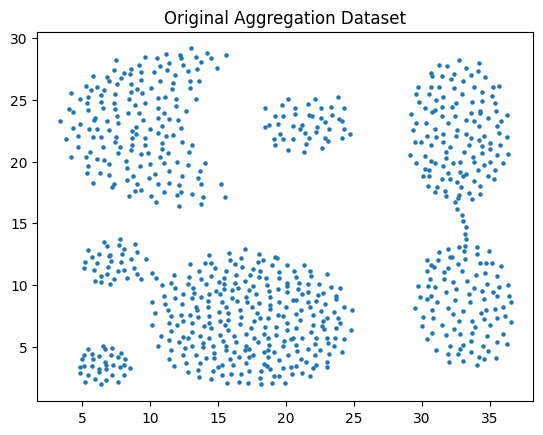

Best parameters: eps=1.500, min_samples=5
Clustering Entropy: 0.0000 bits


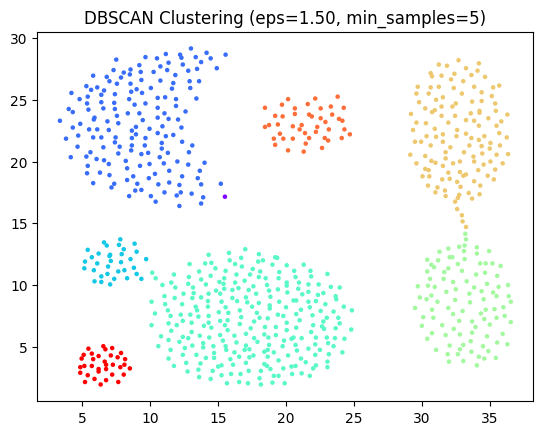

In [59]:
#find the best parameters to match the actual number of clusters


#load dataset
data = np.loadtxt("aggregation.txt")

#plot original
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title(f"Original Aggregation Dataset")
plt.show()

goal = 7


best_score = float('inf')
best_params = None
best_labels = None

eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15]

#try different eps and min_sample pairs
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        #if the number of clusters is correct, get the score to try and find best clustering
        if n_clusters == goal:
            score = clustering_entropy(labels)
            if score < best_score:                  #remember, want low entropy
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
        
        # #plot clusters
        # plt.figure(figsize=(6,6))
        # plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10')
        # plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}, clusters={n_clusters}')
        # plt.xlabel('Feature 1')
        # plt.ylabel('Feature 2')
        # plt.grid(True)
        # plt.show()

# Show results
print(f"Best parameters: eps={best_params[0]:.3f}, min_samples={best_params[1]}")
print(f"Clustering Entropy: {best_score:.4f} bits")

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='rainbow', s=5)
plt.title(f"DBSCAN Clustering (eps={best_params[0]:.2f}, min_samples={best_params[1]})")
plt.show()



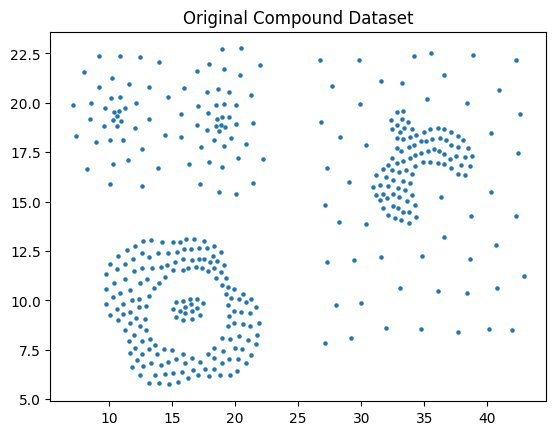

Best parameters: eps=1.500, min_samples=3
Clustering Entropy: 0.0000 bits


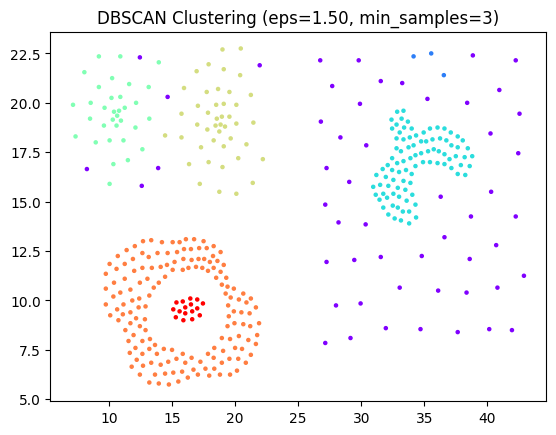

In [60]:
#find the best parameters to match the actual number of clusters

#load dataset
data = np.loadtxt("compound.txt")

#plot original
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title(f"Original Compound Dataset")
plt.show()


best_score = float('inf')
best_params = None
best_labels = None

goal = 6
eps_values = [0.25, 0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 4, 5, 6, 7]

#try different eps and min_sample pairs
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        #if the number of clusters is correct, get the score to try and find best clustering
        if n_clusters == goal:
            score = clustering_entropy(labels)
            if score < best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
        
        # #plot clusters
        # plt.figure(figsize=(6,6))
        # plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10')
        # plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}, clusters={n_clusters}')
        # plt.xlabel('Feature 1')
        # plt.ylabel('Feature 2')
        # plt.grid(True)
        # plt.show()

# Show results
print(f"Best parameters: eps={best_params[0]:.3f}, min_samples={best_params[1]}")
print(f"Clustering Entropy: {best_score:.4f} bits")

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='rainbow', s=5)
plt.title(f"DBSCAN Clustering (eps={best_params[0]:.2f}, min_samples={best_params[1]})")
plt.show()



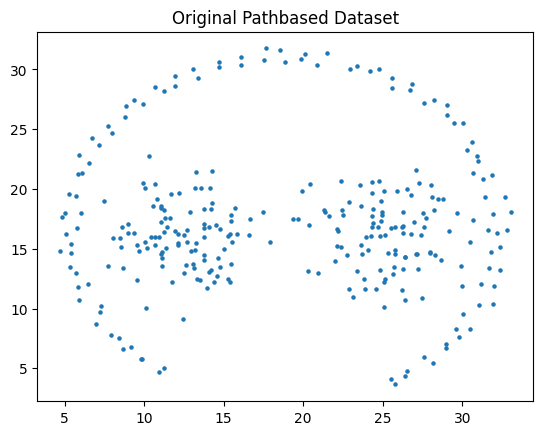

Best parameters: eps=2.000, min_samples=3
Clustering Entropy: 0.0000 bits


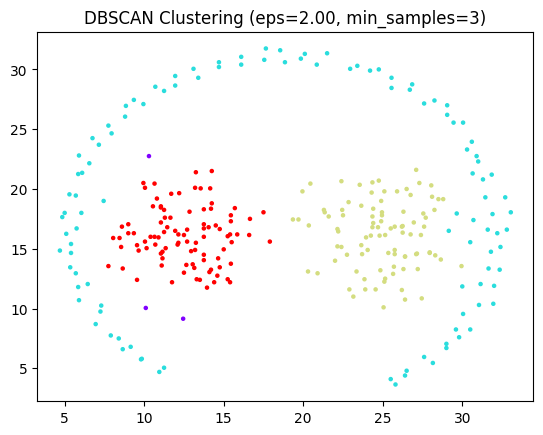

In [61]:
#find the best parameters to match the actual number of clusters


#load dataset
data = np.loadtxt("pathbased.txt")

#plot original
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title(f"Original Pathbased Dataset")
plt.show()

goal = 3


best_score = float('inf')
best_params = None
best_labels = None

eps_values = [1.8, 2.0, 2.2]
min_samples_values = [3, 4, 5, 6]

#try different eps and min_sample pairs
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        #if the number of clusters is correct, get the score to try and find best clustering
        if n_clusters == goal:
            score = clustering_entropy(labels)
            if score < best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
        
        # #plot clusters
        # plt.figure(figsize=(6,6))
        # plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10')
        # plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}, clusters={n_clusters}')
        # plt.xlabel('Feature 1')
        # plt.ylabel('Feature 2')
        # plt.grid(True)
        # plt.show()

# Show results
print(f"Best parameters: eps={best_params[0]:.3f}, min_samples={best_params[1]}")
print(f"Clustering Entropy: {best_score:.4f} bits")

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='rainbow', s=5)
plt.title(f"DBSCAN Clustering (eps={best_params[0]:.2f}, min_samples={best_params[1]})")
plt.show()



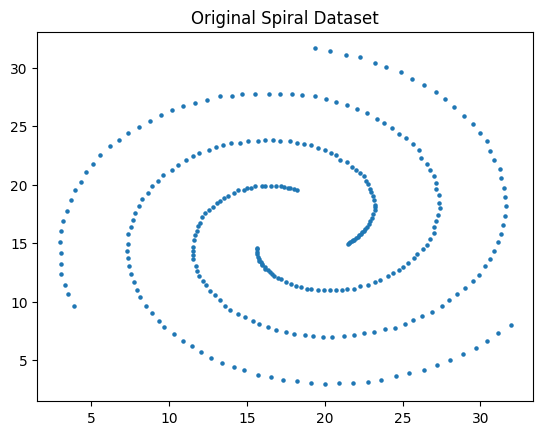

Best parameters: eps=0.500, min_samples=5
Clustering Entropy: 0.0000 bits


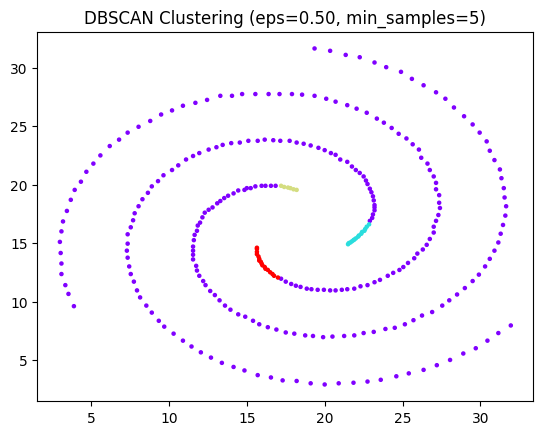

In [62]:
#find the best parameters to match the actual number of clusters


#load dataset
data = np.loadtxt("spiral.txt")

#plot original
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title(f"Original Spiral Dataset")
plt.show()


best_score = float('inf')
best_params = None
best_labels = None

eps_values = [0.5, 0.55, 0.6]
min_samples_values = [3, 4, 5]
goal = 3  # 3 spirals!

#try different eps and min_sample pairs
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        #if the number of clusters is correct, get the score to try and find best clustering
        if n_clusters == goal:
            score = clustering_entropy(labels)
            if score < best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
        
        # #plot clusters
        # plt.figure(figsize=(6,6))
        # plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10')
        # plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}, clusters={n_clusters}')
        # plt.xlabel('Feature 1')
        # plt.ylabel('Feature 2')
        # plt.grid(True)
        # plt.show()

# Show results
print(f"Best parameters: eps={best_params[0]:.3f}, min_samples={best_params[1]}")
print(f"Clustering Entropy: {best_score:.4f} bits")

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='rainbow', s=5)
plt.title(f"DBSCAN Clustering (eps={best_params[0]:.2f}, min_samples={best_params[1]})")
plt.show()



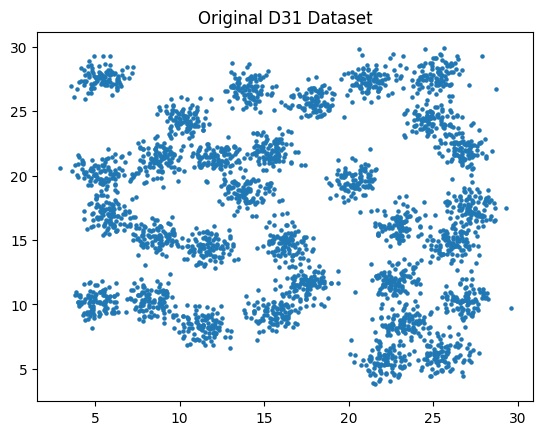

Best parameters: eps=0.700, min_samples=5
Clustering Entropy: 0.0000 bits


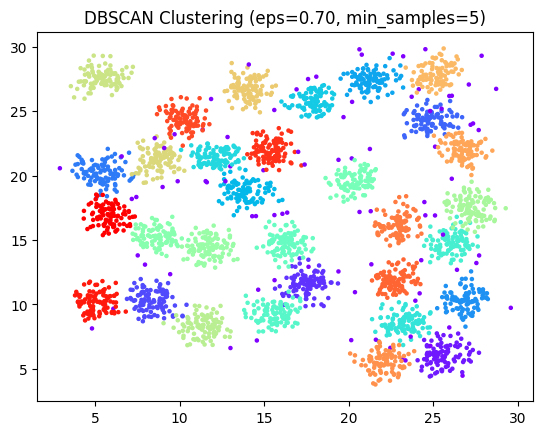

In [63]:
#find the best parameters to match the actual number of clusters


#load dataset
data = np.loadtxt("d31.txt")

#plot original
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title(f"Original D31 Dataset")
plt.show()


best_score = float('inf')
best_params = None
best_labels = None

eps_values = [0.2, 0.5, 0.7, 1.0]
min_samples_values = [5, 6, 7, 10]
goal = 31  

#try different eps and min_sample pairs
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        #if the number of clusters is correct, get the score to try and find best clustering
        if n_clusters == goal:
            score = clustering_entropy(labels)
            if score < best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
        
        # #plot clusters
        # plt.figure(figsize=(6,6))
        # plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10')
        # plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}, clusters={n_clusters}')
        # plt.xlabel('Feature 1')
        # plt.ylabel('Feature 2')
        # plt.grid(True)
        # plt.show()

# Show results
print(f"Best parameters: eps={best_params[0]:.3f}, min_samples={best_params[1]}")
print(f"Clustering Entropy: {best_score:.4f} bits")

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='rainbow', s=5)
plt.title(f"DBSCAN Clustering (eps={best_params[0]:.2f}, min_samples={best_params[1]})")
plt.show()



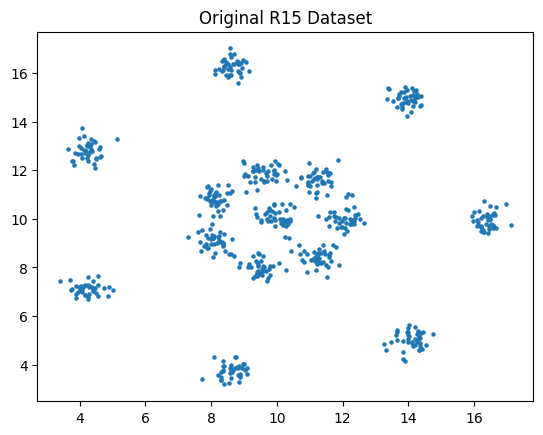

Best parameters: eps=0.500, min_samples=5
Clustering Entropy: 0.0000 bits


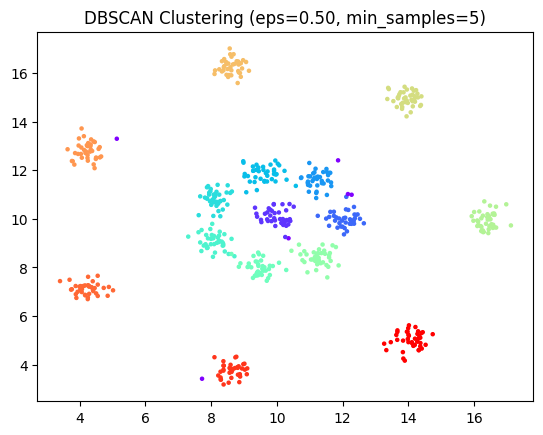

In [64]:
#find the best parameters to match the actual number of clusters


#load dataset
data = np.loadtxt("r15.txt")

#plot original
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title(f"Original R15 Dataset")
plt.show()


best_score = float('inf')
best_params = None
best_labels = None

eps_values = [0.2, 0.5, 0.7, 1.0]
min_samples_values = [5, 6, 7, 10]
goal = 15

#try different eps and min_sample pairs
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        #if the number of clusters is correct, get the score to try and find best clustering
        if n_clusters == goal:
            score = clustering_entropy(labels)
            if score < best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
        
        # #plot clusters
        # plt.figure(figsize=(6,6))
        # plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10')
        # plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}, clusters={n_clusters}')
        # plt.xlabel('Feature 1')
        # plt.ylabel('Feature 2')
        # plt.grid(True)
        # plt.show()

# Show results
print(f"Best parameters: eps={best_params[0]:.3f}, min_samples={best_params[1]}")
print(f"Clustering Entropy: {best_score:.4f} bits")

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='rainbow', s=5)
plt.title(f"DBSCAN Clustering (eps={best_params[0]:.2f}, min_samples={best_params[1]})")
plt.show()



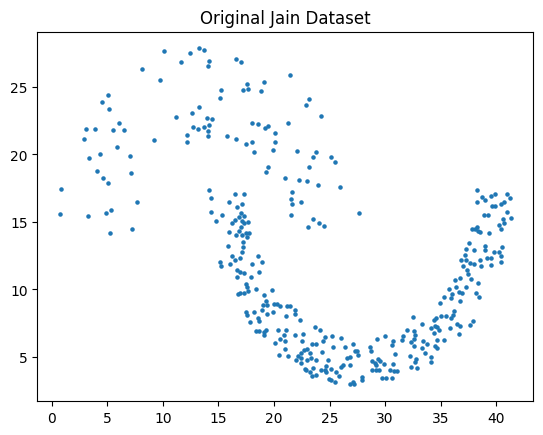

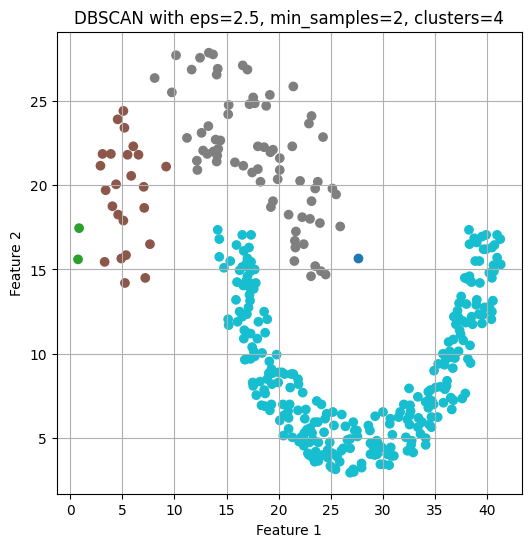

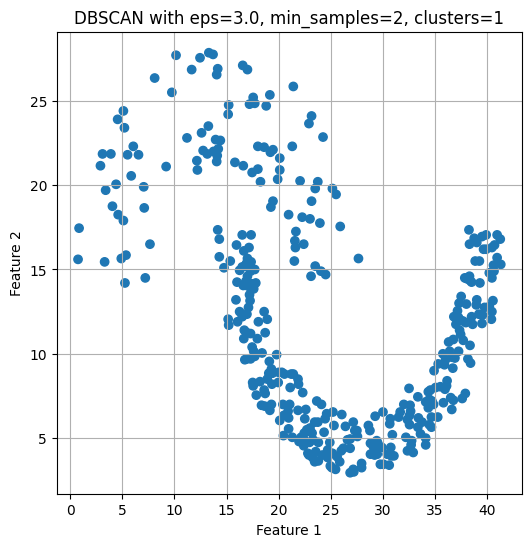

TypeError: 'NoneType' object is not subscriptable

In [65]:
#find the best parameters to match the actual number of clusters


#load dataset
data = np.loadtxt("jain.txt")

#plot original
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title(f"Original Jain Dataset")
plt.show()


best_score = float('inf')
best_params = None
best_labels = None

eps_values = [2.5, 3.0]
min_samples_values = [2]
goal = 2

#try different eps and min_sample pairs
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        #if the number of clusters is correct, get the score to try and find best clustering
        if n_clusters == goal:
            score = clustering_entropy(labels)
            if score < best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
        
        #plot clusters
        plt.figure(figsize=(6,6))
        plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10')
        plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}, clusters={n_clusters}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.grid(True)
        plt.show()

# Show results
print(f"Best parameters: eps={best_params[0]:.3f}, min_samples={best_params[1]}")
print(f"Clustering Entropy: {best_score:.4f} bits")

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='rainbow', s=5)
plt.title(f"DBSCAN Clustering (eps={best_params[0]:.2f}, min_samples={best_params[1]})")
plt.show()



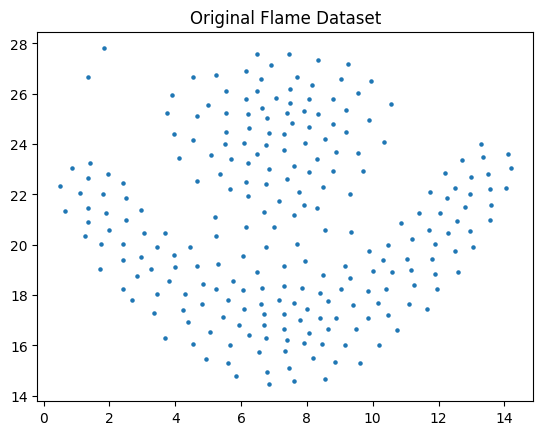

Best parameters: eps=0.900, min_samples=4
Clustering Entropy: 0.0000 bits


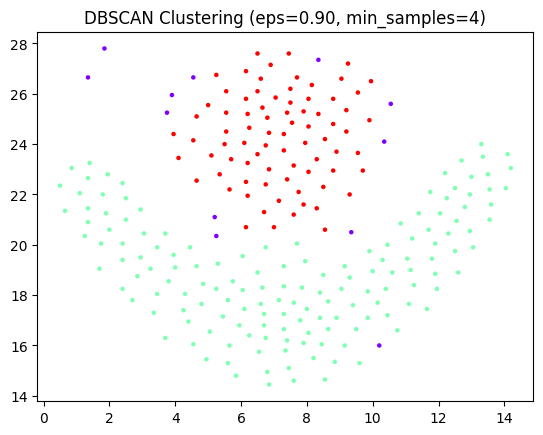

In [66]:
#find the best parameters to match the actual number of clusters


#load dataset
data = np.loadtxt("flame.txt")

#plot original
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title(f"Original Flame Dataset")
plt.show()


best_score = float('inf')
best_params = None
best_labels = None

eps_values = [0.8, 0.9, 1.0, 1.1, 1.2]
min_samples_values = [4, 5, 6, 7]
goal = 2

#try different eps and min_sample pairs
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        #if the number of clusters is correct, get the score to try and find best clustering
        if n_clusters == goal:
            score = clustering_entropy(labels)
            if score < best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
        
        # #plot clusters
        # plt.figure(figsize=(6,6))
        # plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10')
        # plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}, clusters={n_clusters}')
        # plt.xlabel('Feature 1')
        # plt.ylabel('Feature 2')
        # plt.grid(True)
        # plt.show()

# Show results
print(f"Best parameters: eps={best_params[0]:.3f}, min_samples={best_params[1]}")
print(f"Clustering Entropy: {best_score:.4f} bits")

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='rainbow', s=5)
plt.title(f"DBSCAN Clustering (eps={best_params[0]:.2f}, min_samples={best_params[1]})")
plt.show()



### Agregation
- eps : 1.5 
- min_samples : 5

### Comound
- eps : 1.5 
- min_samples : 3

### Pathbased
- eps : 2
- min_samples : 3

### Spiral
- eps : 0.5
- min_samples : 5
- Note this clustering is still quite poor. DBScan struggles with spiral as the density changes within the cluster. Dense inside -> sparse outside

### D31
- eps : 0.7
- min_samples : 5

### R15
- eps : 0.5
- min_samples : 5

### Jain
- Hyperparameters to get 2 clusters could not be found. This is because one clutser is dense while the other more spare. DBScan struggles with varying densities.

### Flame
- eps : 0.9
- min_samples : 4